<a href="https://colab.research.google.com/github/Kanaisabhi/Data_Analysis_Projects/blob/main/Trader_Performance%26Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
%pip install matplotlib seaborn pandas numpy
#installing all the required libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df1 = pd.read_csv('fear_greed_index.csv')
df2 = pd.read_csv('historical_data.csv')
#uploading the files to read.

#Performing on first dataset

In [8]:
#let's perform action first on df1 dataset.
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [10]:
#Here we got a timestamp which looks like useless for this so i removed it.
df1.drop('timestamp', axis = 1 , inplace=True)
df1.head()

,value,classification,date
0,30,Fear,2018-02-01
1,15,Extreme Fear,2018-02-02
2,40,Fear,2018-02-03
3,24,Extreme Fear,2018-02-04
4,11,Extreme Fear,2018-02-05


In [11]:
df1 = df1[['date' , 'classification' , 'value']] # reaaranging the order of file
df1 = df1.rename(columns={
    'classification' : 'Sentiment',
    'value' : 'Sentiment_value'
}) #changing some names for better understanding and performing operations.

Now let's change the datatype of date into working type

In [12]:
df1['date'] = pd.to_datetime(df1['date'])#changed it into datetime format
df1['date'] = df1['date'].dt.date #pull out the date context
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             2644 non-null   object
 1   Sentiment        2644 non-null   object
 2   Sentiment_value  2644 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 62.1+ KB


#Performing on Second Dataset

In [13]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [14]:
cols = ['Account' , 'Execution Price' , 'Size Tokens' , 'Start Position','Transaction Hash','Order ID','Trade ID','Timestamp']
df2.drop(cols , axis = 1 , inplace=True) #dropping all unwanted columns

In [15]:
df2.head()

,Coin,Size USD,Side,Timestamp IST,Direction,Closed PnL,Crossed,Fee
0,@107,7872.16,BUY,02-12-2024 22:50,Buy,0.0,True,0.345404
1,@107,127.68,BUY,02-12-2024 22:50,Buy,0.0,True,0.005600
2,@107,1150.63,BUY,02-12-2024 22:50,Buy,0.0,True,0.050431
3,@107,1142.04,BUY,02-12-2024 22:50,Buy,0.0,True,0.050043
4,@107,69.75,BUY,02-12-2024 22:50,Buy,0.0,True,0.003055


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Coin           211224 non-null  object 
 1   Size USD       211224 non-null  float64
 2   Side           211224 non-null  object 
 3   Timestamp IST  211224 non-null  object 
 4   Direction      211224 non-null  object 
 5   Closed PnL     211224 non-null  float64
 6   Crossed        211224 non-null  bool   
 7   Fee            211224 non-null  float64
dtypes: bool(1), float64(3), object(4)
memory usage: 11.5+ MB


In [17]:
df2['Timestamp IST'] = pd.to_datetime(df2['Timestamp IST'],format='mixed',dayfirst=True) #has to define format and dayfirst because of different date format.
df2['Date'] = df2['Timestamp IST'].dt.date #changed the timestamp dtype from object to datetime in date
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Coin           211224 non-null  object        
 1   Size USD       211224 non-null  float64       
 2   Side           211224 non-null  object        
 3   Timestamp IST  211224 non-null  datetime64[ns]
 4   Direction      211224 non-null  object        
 5   Closed PnL     211224 non-null  float64       
 6   Crossed        211224 non-null  bool          
 7   Fee            211224 non-null  float64       
 8   Date           211224 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(3), object(4)
memory usage: 13.1+ MB


In [18]:
df2 = df2.rename(columns={
    'Coin':'coin',
    'Size USD' : 'size_usd',
    'Side' : 'side',
    'Timestamp IST' : 'timestamp_ist',
    'Date' : 'date',
    'Direction' : 'direction',
    'Closed PnL' : 'closed_pnl',
    'Fee' : 'fee',
    'Crossed' : 'crossed'
})
df2.head() #renaming some columns for better processing

,coin,size_usd,side,timestamp_ist,direction,closed_pnl,crossed,fee,date
0,@107,7872.16,BUY,2024-12-02 22:50:00,Buy,0.0,True,0.345404,2024-12-02
1,@107,127.68,BUY,2024-12-02 22:50:00,Buy,0.0,True,0.005600,2024-12-02
2,@107,1150.63,BUY,2024-12-02 22:50:00,Buy,0.0,True,0.050431,2024-12-02
3,@107,1142.04,BUY,2024-12-02 22:50:00,Buy,0.0,True,0.050043,2024-12-02
4,@107,69.75,BUY,2024-12-02 22:50:00,Buy,0.0,True,0.003055,2024-12-02


In [19]:
df2 = df2.dropna(subset=['closed_pnl']) #dropping all NULL values ... if had

#Merging both dataset.

In [20]:
merged_df = pd.merge(df1, df2, on='date', how='inner') #merged both dataset by date
merged_df.head()

,date,Sentiment,Sentiment_value,coin,size_usd,side,timestamp_ist,direction,closed_pnl,crossed,fee
0,2023-05-01,Greed,63,ETH,183.53,BUY,2023-05-01 01:06:00,Open Long,0.0,True,0.000000
1,2023-05-01,Greed,63,ETH,156.39,BUY,2023-05-01 01:06:00,Open Long,0.0,True,0.000000
2,2023-05-01,Greed,63,ETH,137.08,BUY,2023-05-01 01:06:00,Open Long,0.0,True,0.000000
3,2023-12-05,Extreme Greed,75,ETH,1100.11,BUY,2023-12-05 03:11:00,Open Long,0.0,True,0.275027
4,2023-12-05,Extreme Greed,75,ETH,1935.95,BUY,2023-12-05 03:11:00,Open Long,0.0,True,0.483987


In [21]:
merged_df.isna().sum() #Checking if there any null value or missing values

,0
date,0
Sentiment,0
Sentiment_value,0
coin,0
size_usd,0
side,0
timestamp_ist,0
direction,0
closed_pnl,0
crossed,0


In [22]:
merged_df.duplicated().sum() #To check if there any duplicate available


np.int64(22004)

In [23]:
merged_df['closed_pnl'].describe() #To check value is realistic/valid


,closed_pnl
count,211218.000000
mean,48.549304
std,917.989791
min,-117990.104100
25%,0.000000
50%,0.000000
75%,5.790132
max,135329.090100


In [24]:
merged_df['size_usd'].describe() #To check if there any noise(negative value) or dust value(0 or <0)


,size_usd
count,2.112180e+05
mean,5.639192e+03
std,3.657557e+04
min,0.000000e+00
25%,1.937900e+02
50%,5.970200e+02
75%,2.058878e+03
max,3.921431e+06


In [25]:
merged_df['crossed'].value_counts() #To check valid bools


,count
crossed,
True,128403
False,82815


In [26]:
merged_df['Sentiment'].value_counts() #To check any typos or different Sentiments other than them


,count
Sentiment,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [27]:
# Remove zero-size trades
merged_df = merged_df[merged_df['size_usd'] > 0].copy()

# Make Sentiment ordered
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
merged_df['Sentiment'] = pd.Categorical(merged_df['Sentiment'], categories=sentiment_order, ordered=True)


/tmp/ipython-input-4016286292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


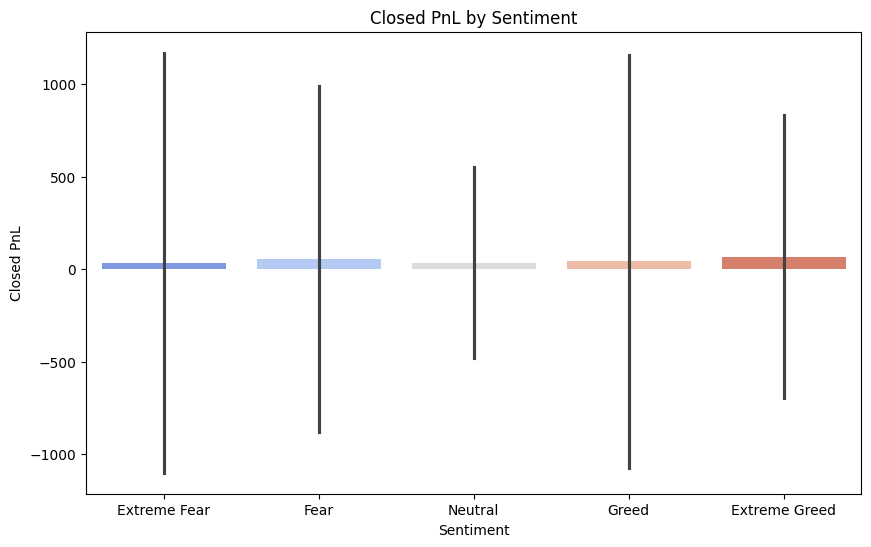

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged_df,
    x='Sentiment',
    y='closed_pnl',
    errorbar='sd',#using standard deviation for risk viotality
    palette='coolwarm'
)
plt.title('Closed PnL by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.show()

Shows if traders perform better in greed vs fear.

/tmp/ipython-input-2542399431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


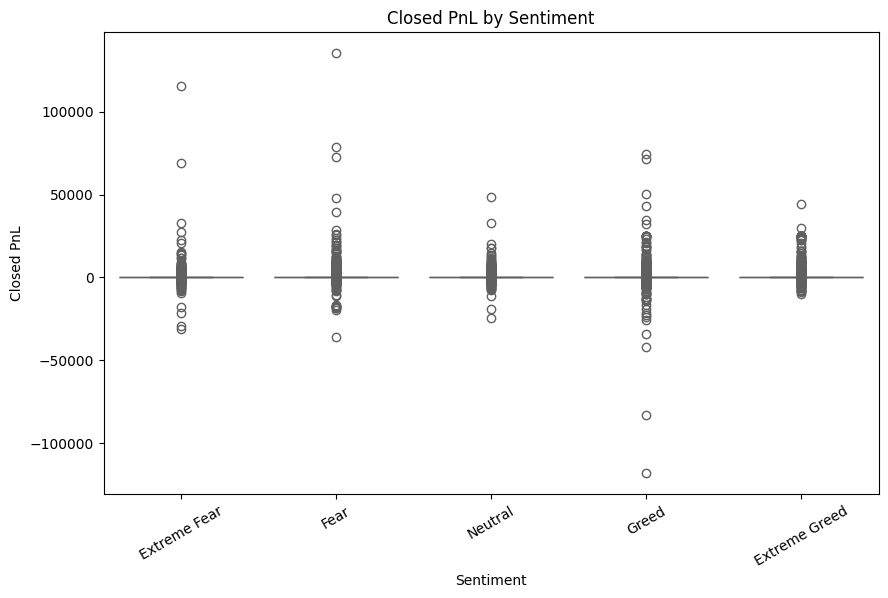

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=merged_df,
    x='Sentiment',
    y='closed_pnl',
    palette='coolwarm'
)
plt.title('Closed PnL by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=30)
plt.show()

Visualizing losses , gains and outliers also difference become obvious

/tmp/ipython-input-3421268642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


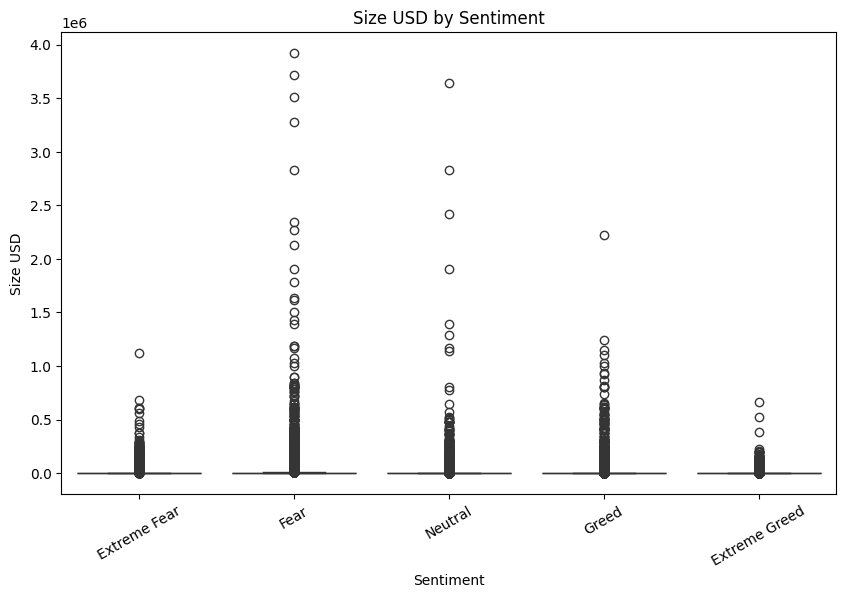

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=merged_df,
    x='Sentiment',
    y='size_usd',
    palette='viridis'
)
plt.title('Size USD by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Size USD')
plt.xticks(rotation=30)
plt.show()

If larger trades during greed/extreme greed then can indicate higher risk appetite

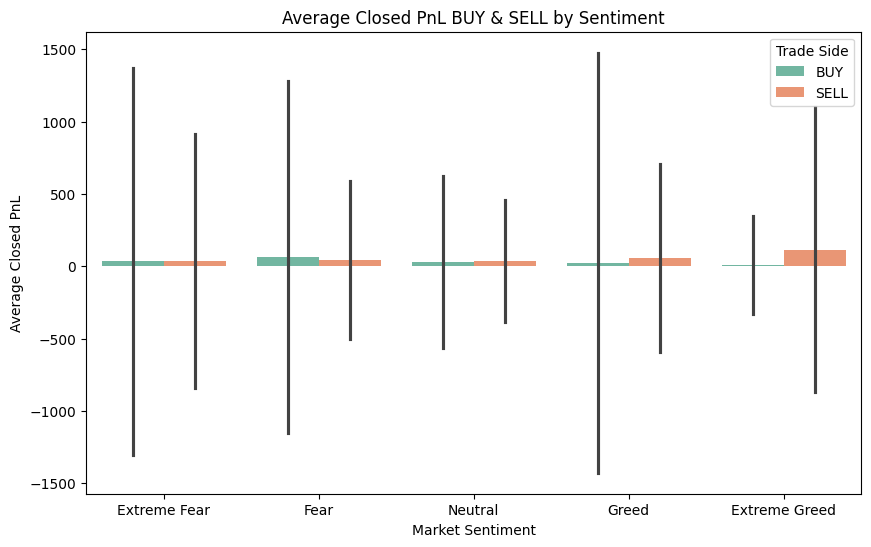

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged_df,
    x='Sentiment',
    y='closed_pnl',
    errorbar='sd',
    hue = 'side',
    palette='Set2')
plt.title('Average Closed PnL BUY & SELL by Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.legend(title='Trade Side')
plt.show()

Shows buys and sells perform better under different sentiments.

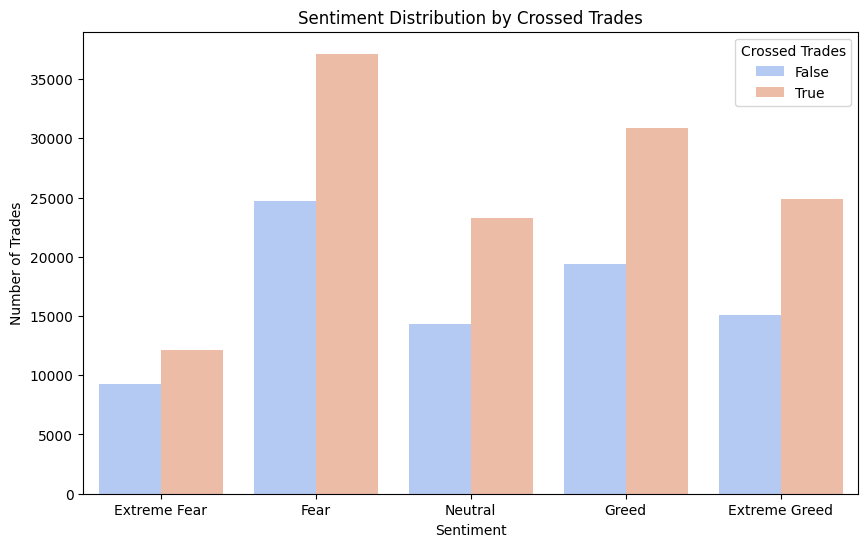

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=merged_df,
    x='Sentiment',
    hue='crossed',
    palette='coolwarm'
)
plt.title('Sentiment Distribution by Crossed Trades')
plt.xlabel('Sentiment')
plt.ylabel('Number of Trades')
plt.legend(title='Crossed Trades')
plt.show()

Shows behaviour like traders more aggresive in fear. Can use to relate agressiveness to performance later.

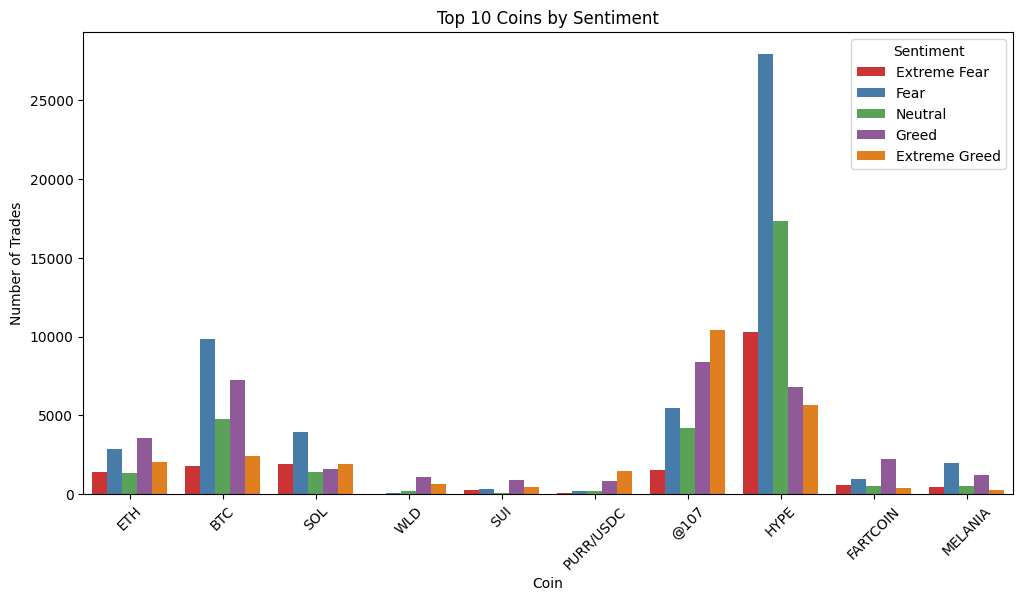

In [39]:
top_coins = merged_df['coin'].value_counts().nlargest(10).index
merged_df[merged_df['coin'].isin(top_coins)]
plt.figure(figsize=(12, 6))
sns.countplot(
    data=merged_df[merged_df['coin'].isin(top_coins)],
    x='coin',
    hue='Sentiment',
    palette='Set1'
)
plt.title('Top 10 Coins by Sentiment')
plt.xlabel('Coin')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

Using coins to indicate behavioral patterns and shows which coins are prefferend under different market sentiments.